## EDA Mini Project

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### 1. Importing dataset

In [2]:
data = pd.read_excel('LungCap Dataset.xls')

In [3]:
data.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


### 2. Structure of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
LungCap(cc)       725 non-null float64
Age( years)       725 non-null int64
Height(inches)    725 non-null float64
Smoke             725 non-null object
Gender            725 non-null object
Caesarean         725 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


- The data contains 6 features and 725 samples
- There are no null values in this dataset
- The first three columns ('LungCap', 'Age' and 'Height') are numerical
- The other three columns ('Smoke', 'Gender','Caesarean') are categorical

- Renaming first three columns for better usability
- LungCap is measured in cc, Age in years and Height in inches

### 3. Graphical Exploration

In [5]:
data.rename(columns={'LungCap(cc)':'LungCap', 'Age( years)':'Age', 'Height(inches)':'Height'},inplace=True)
data.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


For the categorical variables, bar plots and pie plots will show us how many of each value is available

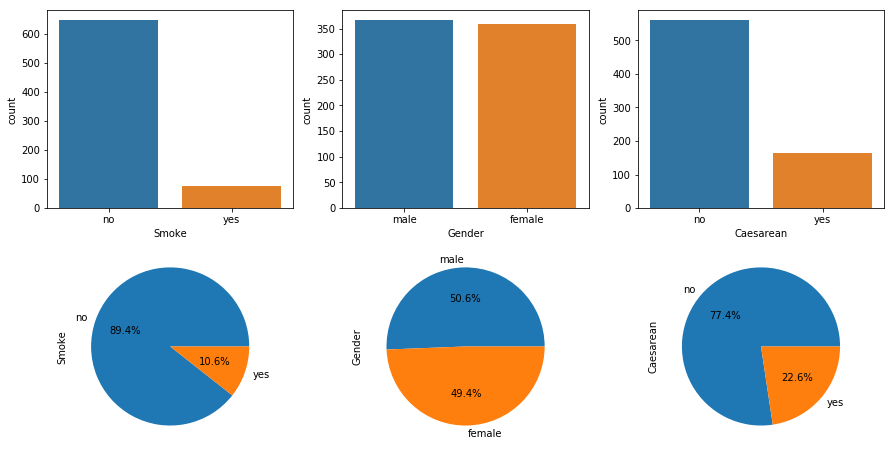

In [6]:
fig,ax = plt.subplots(2,3,figsize=(15,8))
sns.countplot(data['Smoke'],ax=ax[0,0])
sns.countplot(data['Gender'],ax=ax[0,1])
sns.countplot(data['Caesarean'],ax=ax[0,2])
data['Smoke'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,0])
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,1])
data['Caesarean'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1,2])
plt.show()

- The data contains ~90% non-smokers
- Data equally avaible for male and female patients
- Nearly 23% of data have 'caesarean'

Breaking up the countplots may give us a better idea about relationship between categrical variables

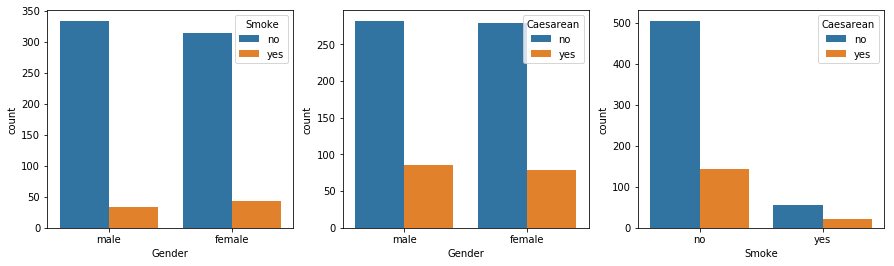

In [7]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
sns.countplot(x='Gender',hue='Smoke',data=data,ax=ax[0])
sns.countplot(x='Gender',hue='Caesarean',data=data,ax=ax[1])
sns.countplot(x='Smoke',hue='Caesarean',data=data,ax=ax[2])
plt.show()

- no clear realtionship between the variables
- there are approximately equal ratio of smokers,no-smokers between genders
- there are approximately equal ratio of caesareans and non-caesareans between genders
- there are approximately equal ratio of caesareans and non-caesareans between smokers and non-smokers

For the numerical columns, Denisty plots and box plots will help us understand the distribution of data and identify outliers if any

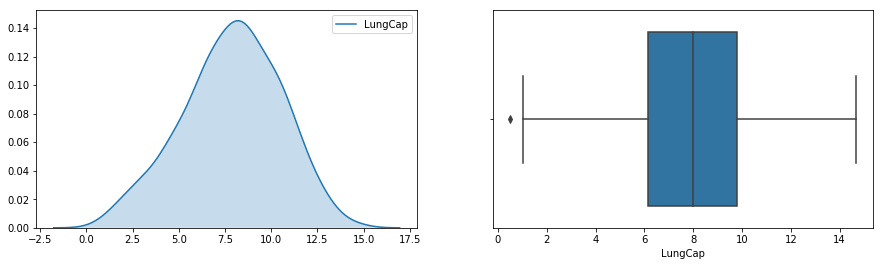

skew = -0.22787342323500312
kurt = -0.31240604791681914


In [8]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.kdeplot(data['LungCap'],shade=True,ax=ax[0])
sns.boxplot(data['LungCap'],ax=ax[1])
plt.show()
print('skew =',data['LungCap'].skew())
print('kurt =',data['LungCap'].kurt())

- The Density curve is close to a normal bell curve but is slightly left skewed
- The Box plot helps us identify one outlier to the left which explains the slight skew in the curve

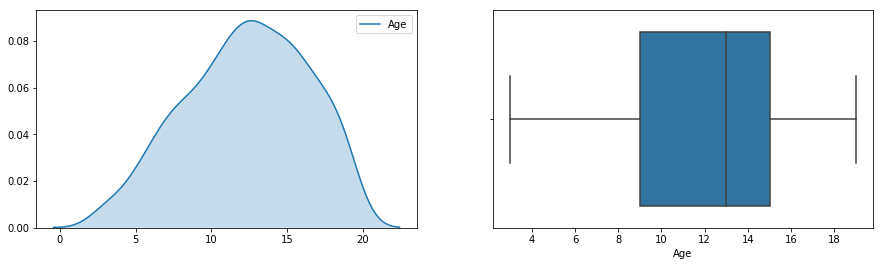

skew = -0.2579439836892384
kurt = -0.6970933449252192


In [9]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.kdeplot(data['Age'],shade=True,ax=ax[0])
sns.boxplot(data['Age'],ax=ax[1])
plt.show()
print('skew =',data['Age'].skew())
print('kurt =',data['Age'].kurt())

- The Density Curve is slightly left-skewed
- The box plot does not show any outliers but we can see range on the left side of median is more than range on right side

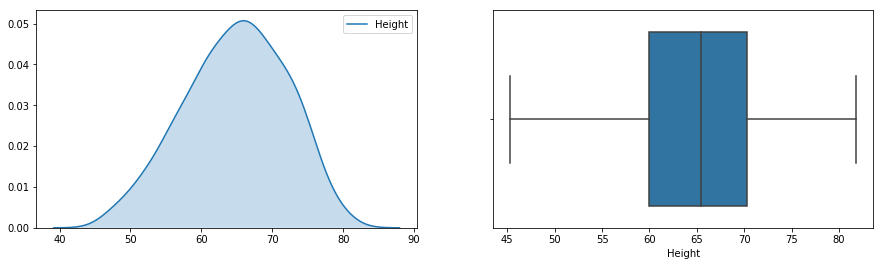

skew = -0.22649365343033823
kurt = -0.4995815956226419


In [10]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.kdeplot(data['Height'],shade=True,ax=ax[0])
sns.boxplot(data['Height'],ax=ax[1])
plt.show()
print('skew =',data['Height'].skew())
print('kurt =',data['Height'].kurt())

- The Density Curve is slightly left-skewed
- The box plot does not show any outliers

Removing Outlier found in LungCapacity boxplot may give better results going forward

In [11]:
q1 = data['LungCap'].quantile(0.25)
q3 = data['LungCap'].quantile(0.75)
iqr = q3-q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

In [12]:
data = data[(data['LungCap']>=ll) & (data['LungCap']<=ul)]

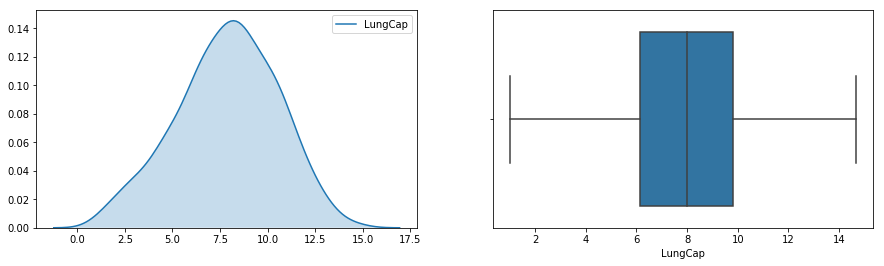

In [13]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.kdeplot(data['LungCap'],shade=True,ax=ax[0])
sns.boxplot(data['LungCap'],ax=ax[1])
plt.show()

- The outlier observed before has now been removed

Violin plots will help us recognize relationship betwen categorical and numerical variables

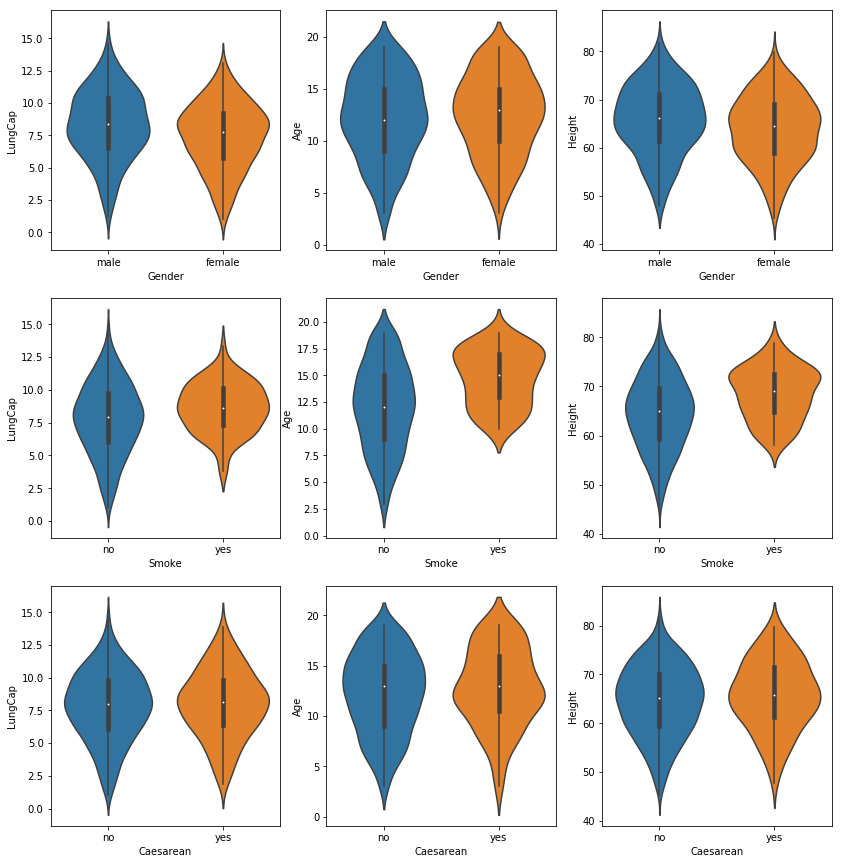

In [14]:
fig,ax = plt.subplots(3,3,figsize=(14,15))
sns.violinplot(x='Gender',y='LungCap',data=data,ax=ax[0,0])
sns.violinplot(x='Gender',y='Age',data=data,ax=ax[0,1])
sns.violinplot(x='Gender',y='Height',data=data,ax=ax[0,2])
sns.violinplot(x='Smoke',y='LungCap',data=data,ax=ax[1,0])
sns.violinplot(x='Smoke',y='Age',data=data,ax=ax[1,1])
sns.violinplot(x='Smoke',y='Height',data=data,ax=ax[1,2])
sns.violinplot(x='Caesarean',y='LungCap',data=data,ax=ax[2,0])
sns.violinplot(x='Caesarean',y='Age',data=data,ax=ax[2,1])
sns.violinplot(x='Caesarean',y='Height',data=data,ax=ax[2,2])
plt.show()

- Males on average are taller and have more lung capacity than females
- Smokers are older,taller and have more lung capacity than non-smokers
- There is more dispersion in non-smokers for all three variables than for smokers
- The Lung capcaity, height and age for patients Caesareans and non-Caesareans have similar distribution

### 4. Descriptive Statistics

In [15]:
data.describe()

,LungCap,Age,Height
count,724.000000,724.000000,724.000000
mean,7.873308,12.339779,64.854558
std,2.649744,3.992457,7.190269
min,1.025000,3.000000,45.300000
25%,6.150000,9.750000,59.900000
50%,8.000000,13.000000,65.400000
75%,9.806250,15.000000,70.325000
max,14.675000,19.000000,81.800000


- The LungCap ranges between 1 and 15 with mean, median close to 8
- The Age ranges between 3 and 19 with mean, median close to 12-13
- The Height ranges between 45 and 82 with mean, median close to 64-65

Looking at the Correlation between the numerical variables will give us an idea about the relatiosnship between them

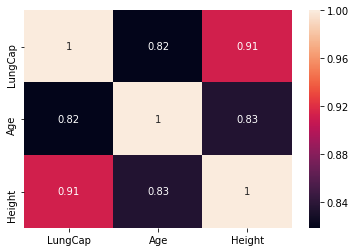

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

- There is high correlation among 'LungCap', 'Age' and 'Height'
- Since patients age ranges between 3 and 19, it makes sense that height and lung capacity would also increase correspondingly
- Hence, this correlation is not very surprising

- Scatter plots will give us better visualization of the relationship among variables

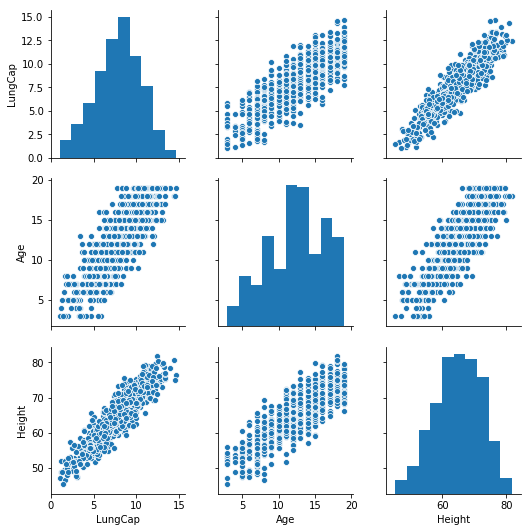

In [17]:
sns.pairplot(data)
plt.show()

### 5. Insights

- With increase in age, height and lung capcity increase
- Males are usually taller and have more lung capacity
- There is no effect on height, lung capacity whether someone is caesareans or non-caesarean
- There is no effect on height, lung capacity whether someone is smoker or non-smoker
- There is no clear relationship between smoking, gender and casearean